# Pandas处理缺失数据示例

In [4]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'A': [1, 2.1, np.nan, 4.7, 5.6], 'B': [.25, np.nan, np.nan, 4, 12.2]})
print('df：\n',df)
print('df中的元素是否为缺失值：\n',pd.isna(df))
df1 = df.fillna(0)#用固定值来填充
print('用0填充缺失值后的数据：\n',df1)
df2 = df.fillna(value={'A': 1, 'B': 2}) #将A、B列中的NaN分别替换为1、2
print('用字典填充缺失值后的数据：\n',df2)
df3 = df.fillna(df.mean()) #用每列的平均值来填充
print('用每列的平均值填充缺失值后的数据：\n',df3)
df4 = df.dropna()
print('删除缺失值后的数据：\n',df4)
df5=df.interpolate()
print('线性插值法填充缺失值后的数据：\n',df5)
df6= df.interpolate(method='polynomial',order=2)
print('多项式插值法填充缺失值后的数据：\n',df6)

df：
      A      B
0  1.0   0.25
1  2.1    NaN
2  NaN    NaN
3  4.7   4.00
4  5.6  12.20
df中的元素是否为缺失值：
        A      B
0  False  False
1  False   True
2   True   True
3  False  False
4  False  False
用0填充缺失值后的数据：
      A      B
0  1.0   0.25
1  2.1   0.00
2  0.0   0.00
3  4.7   4.00
4  5.6  12.20
用字典填充缺失值后的数据：
      A      B
0  1.0   0.25
1  2.1   2.00
2  1.0   2.00
3  4.7   4.00
4  5.6  12.20
用每列的平均值填充缺失值后的数据：
       A          B
0  1.00   0.250000
1  2.10   5.483333
2  3.35   5.483333
3  4.70   4.000000
4  5.60  12.200000
删除缺失值后的数据：
      A      B
0  1.0   0.25
3  4.7   4.00
4  5.6  12.20
线性插值法填充缺失值后的数据：
      A      B
0  1.0   0.25
1  2.1   1.50
2  3.4   2.75
3  4.7   4.00
4  5.6  12.20
多项式插值法填充缺失值后的数据：
           A       B
0  1.000000   0.250
1  2.100000  -1.975
2  3.433333  -0.725
3  4.700000   4.000
4  5.600000  12.200


# Pandas处理重复数据示例

In [2]:
import pandas as pd
df = pd.DataFrame({'brand': ['YumYum', 'YumYum', 'Indomie', 'Indomie', 'Indomie'], 'style': ['cup', 'cup', 'cup', 'pack', 'pack'], 'rating': [4, 4, 3.5, 15, 5]},index=['a', 'a', 'b', 'c', 'd'])
print('df：\n',df)
print('对于全列，df的行中是否存在重复项：\n',df.duplicated())
df1=df.drop_duplicates()
print('删除上述重复项后的df：\n',df1)
print('对于brand和style列，df的行中是否存在重复项：\n',df.duplicated(subset= ['brand', 'style']))
df2=df.drop_duplicates(subset= ['brand', 'style'])
print('删除上述重复项后的df：\n',df2)
print('df的index是否存在重复项：\n',df.index.duplicated(keep='last'))
df3=df[~df.index.duplicated(keep='last')]
print('删除index重复项后的df：\n',df3)

df：
      brand style  rating
a   YumYum   cup     4.0
a   YumYum   cup     4.0
b  Indomie   cup     3.5
c  Indomie  pack    15.0
d  Indomie  pack     5.0
对于全列，df的行中是否存在重复项：
 a    False
a     True
b    False
c    False
d    False
dtype: bool
删除上述重复项后的df：
      brand style  rating
a   YumYum   cup     4.0
b  Indomie   cup     3.5
c  Indomie  pack    15.0
d  Indomie  pack     5.0
对于brand和style列，df的行中是否存在重复项：
 a    False
a     True
b    False
c    False
d     True
dtype: bool
删除上述重复项后的df：
      brand style  rating
a   YumYum   cup     4.0
b  Indomie   cup     3.5
c  Indomie  pack    15.0
df的index是否存在重复项：
 [ True False False False False]
删除index重复项后的df：
      brand style  rating
a   YumYum   cup     4.0
b  Indomie   cup     3.5
c  Indomie  pack    15.0
d  Indomie  pack     5.0


# merge方法的用法示例

In [3]:
import pandas as pd
left = pd.DataFrame({'key1': ['K0', 'K1', 'K2'],'key2': ['K0', 'K1', 'K0'],'A': ['A0', 'A1', 'A2'],'B': ['B0', 'B1', 'B2']})
right = pd.DataFrame({'key1': ['K0', 'K1', 'K2'],'key2': ['K0', 'K0', 'K0'],'C': ['C0', 'C1', 'C2',], 'D': ['D0', 'D1', 'D2']})
print('left:\n',left)
print('right:\n',right)
result1 = pd.merge(left, right, on='key1') #内连接
print('根据key1列将left和right内连接：\n',result1)
result2 = pd.merge(left, right, on=['key1', 'key2'])
print('根据key1和key2列将left和right内连接：\n',result2)
result3 = pd.merge(left, right, how='outer', on=['key1', 'key2'])
print('根据key1和key2列将left和right外连接：\n',result3)
result4 = pd.merge(left, right, how='left', on=['key1', 'key2'])
print('根据key1和key2列将left和right左连接：\n',result4)
result5 = pd.merge(left, right, how='right', on=['key1', 'key2'])
print('根据key1和key2列将left和right右连接：\n',result5)

left:
   key1 key2   A   B
0   K0   K0  A0  B0
1   K1   K1  A1  B1
2   K2   K0  A2  B2
right:
   key1 key2   C   D
0   K0   K0  C0  D0
1   K1   K0  C1  D1
2   K2   K0  C2  D2
根据key1列将left和right内连接：
   key1 key2_x   A   B key2_y   C   D
0   K0     K0  A0  B0     K0  C0  D0
1   K1     K1  A1  B1     K0  C1  D1
2   K2     K0  A2  B2     K0  C2  D2
根据key1和key2列将left和right内连接：
   key1 key2   A   B   C   D
0   K0   K0  A0  B0  C0  D0
1   K2   K0  A2  B2  C2  D2
根据key1和key2列将left和right外连接：
   key1 key2    A    B    C    D
0   K0   K0   A0   B0   C0   D0
1   K1   K1   A1   B1  NaN  NaN
2   K2   K0   A2   B2   C2   D2
3   K1   K0  NaN  NaN   C1   D1
根据key1和key2列将left和right左连接：
   key1 key2   A   B    C    D
0   K0   K0  A0  B0   C0   D0
1   K1   K1  A1  B1  NaN  NaN
2   K2   K0  A2  B2   C2   D2
根据key1和key2列将left和right右连接：
   key1 key2    A    B   C   D
0   K0   K0   A0   B0  C0  D0
1   K1   K0  NaN  NaN  C1  D1
2   K2   K0   A2   B2  C2  D2


# join方法的用法示例

In [6]:
import pandas as pd
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],'B': ['B0', 'B1', 'B2']},index=['K0', 'K1', 'K2'])
right = pd.DataFrame({'C': ['C0', 'C2', 'C3'], 'D': ['D0', 'D2', 'D3']},index=['K0', 'K2', 'K3'])
print('left:\n',left)
print('right:\n',right)
result1 = left.join(right)
print('left和right左连接（join方法）：\n',result1)
result2 = pd.merge(left, right, left_index=True, right_index=True, how='left')
print('left和right左连接（merge方法）：\n',result2)
result3 = left.join(right, how='inner')
print('left和right内连接（join方法）：\n',result3)
result4 = pd.merge(left, right, left_index=True, right_index=True, how='inner')
print('left和right内连接（merge方法）：\n',result4)
left2 = pd.DataFrame({'key': ['K0', 'K1', 'K0'],'A': ['A0', 'A1', 'A2'],'B': ['B0', 'B1', 'B2']})
print('left2:\n',left2)
result5 = left2.join(right,on='key')
print('left2和right左连接（join方法）：\n',result5)
result6= pd.merge(left2, right, left_on='key', right_index=True, how='left');
print('left2和right左连接（merge方法）：\n',result6)

left:
      A   B
K0  A0  B0
K1  A1  B1
K2  A2  B2
right:
      C   D
K0  C0  D0
K2  C2  D2
K3  C3  D3
left和right左连接（join方法）：
      A   B    C    D
K0  A0  B0   C0   D0
K1  A1  B1  NaN  NaN
K2  A2  B2   C2   D2
left和right左连接（merge方法）：
      A   B    C    D
K0  A0  B0   C0   D0
K1  A1  B1  NaN  NaN
K2  A2  B2   C2   D2
left和right内连接（join方法）：
      A   B   C   D
K0  A0  B0  C0  D0
K2  A2  B2  C2  D2
left和right内连接（merge方法）：
      A   B   C   D
K0  A0  B0  C0  D0
K2  A2  B2  C2  D2
left2:
   key   A   B
0  K0  A0  B0
1  K1  A1  B1
2  K0  A2  B2
left2和right左连接（join方法）：
   key   A   B    C    D
0  K0  A0  B0   C0   D0
1  K1  A1  B1  NaN  NaN
2  K0  A2  B2   C0   D0
left2和right左连接（merge方法）：
   key   A   B    C    D
0  K0  A0  B0   C0   D0
1  K1  A1  B1  NaN  NaN
2  K0  A2  B2   C0   D0


# concat方法的用法示例

In [7]:
import pandas as pd
df1 = pd.DataFrame({'A':['A0','A1','A2'], 'B':['B0','B1','B2'],   'C':['C0','C1','C2'], 'D':['D0','D1','D2']}, index=[0,1,2])
df2 = pd.DataFrame({'A':['A3','A4', 'A5'], 'B':['B3','B4', 'B5'],'C': ['C3','C4', 'C5'], 'D':['D3','D4', 'D5']}, index=[3,4,5])
df3 = pd.DataFrame({'A':['A6','A7','A8'], 'B':['B6','B7','B8'], 'C':['C6','C7','C8'], 'D':['D6','D7','D8']}, index=[6,7,8])
df4 = pd.DataFrame({'B':['B2','B3','B6'], 'D':['D2','D3','D6'], 'F':['F2','F3','F6']}, index=[2,3,6])
result1 = pd.concat([df1,df2,df3])
print('df1、df2和df3纵向外拼接：\n',result1)
result2=pd.concat([df1,df2],axis=1,keys=['df1','df2'])
print('df1和df2横向外拼接（concat方法）：\n',result2)
result3=df1.join(df2, how='outer',lsuffix='_df1',rsuffix='_df2')
print('df1和df2横向外拼接（join方法）：\n',result3)
result4=pd.concat([df1,df3])
print('df1和df3纵向外拼接：\n',result4)
result5=pd.concat([df1,df3],ignore_index=True)
print('df1和df3纵向外拼接并生成新的行标签：\n',result5)
result6=pd.concat([result1,df4], axis=1, join='inner', keys = ['result1','df4'])
print('result1和df4横向内拼接：\n',result6)

df1、df2和df3纵向外拼接：
     A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3
4  A4  B4  C4  D4
5  A5  B5  C5  D5
6  A6  B6  C6  D6
7  A7  B7  C7  D7
8  A8  B8  C8  D8
df1和df2横向外拼接（concat方法）：
    df1                 df2               
     A    B    C    D    A    B    C    D
0   A0   B0   C0   D0  NaN  NaN  NaN  NaN
1   A1   B1   C1   D1  NaN  NaN  NaN  NaN
2   A2   B2   C2   D2  NaN  NaN  NaN  NaN
3  NaN  NaN  NaN  NaN   A3   B3   C3   D3
4  NaN  NaN  NaN  NaN   A4   B4   C4   D4
5  NaN  NaN  NaN  NaN   A5   B5   C5   D5
df1和df2横向外拼接（join方法）：
   A_df1 B_df1 C_df1 D_df1 A_df2 B_df2 C_df2 D_df2
0    A0    B0    C0    D0   NaN   NaN   NaN   NaN
1    A1    B1    C1    D1   NaN   NaN   NaN   NaN
2    A2    B2    C2    D2   NaN   NaN   NaN   NaN
3   NaN   NaN   NaN   NaN    A3    B3    C3    D3
4   NaN   NaN   NaN   NaN    A4    B4    C4    D4
5   NaN   NaN   NaN   NaN    A5    B5    C5    D5
df1和df3纵向外拼接：
     A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D

# pivot方法的用法示例

In [13]:
import pandas as pd
df =pd.DataFrame({'date': ['2020-01-01', '2020-01-02', '2020-01-01','2020-01-02', '2020-01-03', '2020-01-01'], 'variable': ['A', 'A', 'B', 'B', 'B', 'C'], 'value1': [3,4,6,2,8,10],'value2': [13.4, 22.0, 15.3, 7.8, 9.4, 18.0]})
print('df:\n',df)
result1 = df.pivot(index='date',columns='variable',values='value1')
print('重塑为以date列为行标签，variable列为列标签，value1列为数值的对象:\n',result1)
result2 = df.pivot(index='date', columns='variable')
print('重塑为以date列为行标签，variable列为列标签，value1和value2列为数值的对象:\n', result2)

df:
          date variable  value1  value2
0  2020-01-01        A       3    13.4
1  2020-01-02        A       4    22.0
2  2020-01-01        B       6    15.3
3  2020-01-02        B       2     7.8
4  2020-01-03        B       8     9.4
5  2020-01-01        C      10    18.0
重塑为以date列为行标签，variable列为列标签，value1列为数值的对象:
 variable      A    B     C
date                      
2020-01-01  3.0  6.0  10.0
2020-01-02  4.0  2.0   NaN
2020-01-03  NaN  8.0   NaN
重塑为以date列为行标签，variable列为列标签，value1和value2列为数值的对象:
            value1            value2            
variable        A    B     C      A     B     C
date                                           
2020-01-01    3.0  6.0  10.0   13.4  15.3  18.0
2020-01-02    4.0  2.0   NaN   22.0   7.8   NaN
2020-01-03    NaN  8.0   NaN    NaN   9.4   NaN


# melt方法的用法示例

In [14]:
import pandas as pd
df = pd.DataFrame({'first': ['John', 'Mary'], 'last': ['Doe', 'Bo'], 'height': [5.5, 6.0], 'weight': [130, 150]})
print('df:\n',df)
result1=df.melt(id_vars=['first', 'last'])
print('重塑为以first和last列作为标识符，其余列作为测量值的对象:\n',result1)
result2=df.melt(id_vars=['first', 'last'], value_vars='height', var_name='quantity')
print('重塑为以first和last列作为标识符，height列作为测量值的对象:\n', result2)

df:
   first last  height  weight
0  John  Doe     5.5     130
1  Mary   Bo     6.0     150
重塑为以first和last列作为标识符，其余列作为测量值的对象:
   first last variable  value
0  John  Doe   height    5.5
1  Mary   Bo   height    6.0
2  John  Doe   weight  130.0
3  Mary   Bo   weight  150.0
重塑为以first和last列作为标识符，height列作为测量值的对象:
   first last quantity  value
0  John  Doe   height    5.5
1  Mary   Bo   height    6.0


# 药品销售数据处理实例

In [16]:
import pandas as pd
data = pd.read_excel('./朝阳医院2018年销售数据.xlsx')
print('前5行数据：\n',data.head())
data = pd.read_excel('./朝阳医院2018年销售数据.xlsx',dtype={'社保卡号':str,'商品编码':str})
print('数据类型规范后的前5行：\n',data.head())
print('data的shape属性：',data.shape)
#重命名'购药时间'列
data = data.rename(columns={'购药时间':'销售时间'})
#处理缺失值
print('每列缺失值的个数：\n',data.isna().sum()) 
data=data.dropna(how='any')
print('删除缺失值后的shape属性：',data.shape)
#检查重复数据
print('重复数据的统计：',data.duplicated().sum())
#销售时间的数据只保留日期，并转换为日期类型
time=data.loc[:,'销售时间'].str.split(' ',expand=True) 
data.loc[:,'销售时间']=time.loc[:,0] #将分隔后的日期重新赋值为“销售时间”列
data.loc[:,'销售时间']=pd.to_datetime(data.loc[:,'销售时间'], format='%Y-%m-%d',errors='coerce')
print('每列缺失值的个数：\n',data.isna().sum())
data = data.dropna(subset=['销售时间'])
print('data每列数据类型：\n',data.dtypes)
#查看数据的描述统计信息
print('数据的描述统计信息：\n',data.describe())
#删除销售数量小于0的数据
vec_bool=data.loc[:,'销售数量']>0 #布尔数组
data = data.loc[vec_bool,:]
print('删除销售数量小于0的数据后的描述统计信息：\n',data.describe())
#重新设置index
data=data.reset_index(drop=True)
print('清洗后的数据概览：\n',data.info)

前5行数据：
              购药时间          社保卡号      商品编码     商品名称  销售数量   应收金额    实收金额
0  2018-01-01 星期五  1.616528e+06  236702.0  强力VC银翘片   6.0   82.8   69.00
1  2018-01-02 星期六  1.616528e+06  236701.0  清热解毒口服液   1.0   28.0   24.64
2  2018-01-06 星期三  1.260283e+07  236704.0       感康   2.0   16.8   15.00
3  2018-01-11 星期一  1.007034e+10  236701.0  清热解毒口服液   1.0   28.0   28.00
4  2018-01-15 星期五  1.015543e+08  236701.0  清热解毒口服液   8.0  224.0  208.00
数据类型规范后的前5行：
              购药时间           社保卡号    商品编码     商品名称  销售数量   应收金额    实收金额
0  2018-01-01 星期五      001616528  236702  强力VC银翘片   6.0   82.8   69.00
1  2018-01-02 星期六      001616528  236701  清热解毒口服液   1.0   28.0   24.64
2  2018-01-06 星期三     0012602828  236704       感康   2.0   16.8   15.00
3  2018-01-11 星期一  0010070343428  236701  清热解毒口服液   1.0   28.0   28.00
4  2018-01-15 星期五    00101554328  236701  清热解毒口服液   8.0  224.0  208.00
data的shape属性： (6578, 7)
每列缺失值的个数：
 销售时间    2
社保卡号    2
商品编码    1
商品名称    1
销售数量    1
应收金额    1
实收金额    1
dtype: int64
删除

# plot()函数的用法示例

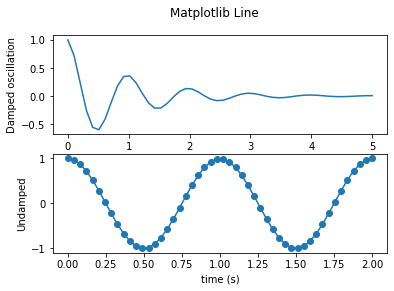

In [18]:
import numpy as np
import matplotlib.pyplot as plt
x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)
y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('Matplotlib Line')
ax1.plot(x1, y1)
ax1.set_ylabel('Damped oscillation')
ax2.plot(x2, y2, 'o-')
ax2.set_xlabel('time (s)')
ax2.set_ylabel('Undamped')
plt.show()